In [1]:
import numpy as np 
import pandas as pd 
import os, datetime
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

**Introdução**

Este é um notebook que criei diretamente no site do kaggle. Para acessar segue o link:

https://www.kaggle.com/leopoldozanellato/covid-19-nos-estados-e-cidades-do-brasil

**O que é COVID-19**
A COVID-19 é uma doença causada pelo coronavírus SARS-CoV-2, que apresenta um quadro clínico que varia de infecções assintomáticas a quadros respiratórios graves. De acordo com a Organização Mundial de Saúde (OMS), a maioria dos pacientes com COVID-19 (cerca de 80%) podem ser assintomáticos e cerca de 20% dos casos podem requerer atendimento hospitalar por apresentarem dificuldade respiratória e desses casos aproximadamente 5% podem necessitar de suporte para o tratamento de insuficiência respiratória (suporte ventilatório).


**O que é o coronavírus?**

Coronavírus é uma família de vírus que causam infecções respiratórias. O novo agente do coronavírus foi descoberto em 31/12/19 após casos registrados na China. Provoca a doença chamada de coronavírus (COVID-19).
Os primeiros coronavírus humanos foram isolados pela primeira vez em 1937. No entanto, foi em 1965 que o vírus foi descrito como coronavírus, em decorrência do perfil na microscopia, parecendo uma coroa.
A maioria das pessoas se infecta com os coronavírus comuns ao longo da vida, sendo as crianças pequenas mais propensas a se infectarem com o tipo mais comum do vírus. Os coronavírus mais comuns que infectam humanos são o alpha coronavírus 229E e NL63 e beta coronavírus OC43, HKU1.

**Observações**

Lembro a todos que sou apenas um estudante, este é apenas um dos meus primeiros trabalhos, sendo assim, fico totalmente aberto para correções, sugestões ou qualquer outro comentário. 
Além do estudo dos estados e das cidades com mais mortes, será realizado também a análise de algumas das cidades da região em que eu moro Rio Claro/Piracicaba

Mapas: https://www.kaggle.com/moiseslima/majson

Dados: https://coronavirus.saude.gov.br/

Dados: https://www.ibge.gov.br/

Datasets: https://www.kaggle.com/unanimad/corona-virus-brazil

In [2]:
covid = pd.read_csv('../input/corona-virus-brazil/brazil_covid19.csv') # dados do covid dos estados
population =pd.read_csv('../input/pip-e-populacao-estados/estimativa.csv',sep=';') # população dos estados 
pib_estados = pd.read_csv('../input/pip-e-populacao-estados/pib_2017.csv',sep=';') # pib dos estados
brasil = pd.read_csv('../input/corona-virus-brazil/brazil_covid19_macro.csv') # dados do covid, macro

In [3]:
today = datetime.date.today()
print("Todos os dados estão atualizados até:", today)

Todos os dados estão atualizados até: 2020-06-09


**PROCESSAMENTO DOS DADOS:** 


In [4]:
population.rename(columns={'estado':'state'}, inplace=True)
pib_estados.rename(columns={'estado':'state'}, inplace=True)

In [5]:
population['Populacao'] = population['Populacao'].apply(lambda x: int(x))
pib_estados['PIB'] = pib_estados['PIB'].apply(lambda x: x.replace('.',""))
pib_estados['PIB per Capita'] = pib_estados['PIB per Capita'].apply(lambda x: x.replace('.',""))
pib_estados['PIB per Capita'] = pib_estados['PIB per Capita'].apply(lambda x: x.replace(',','.'))
pib_estados['PIB'] = pib_estados['PIB'].apply(lambda x: int(x))
pib_estados['PIB per Capita'] = pib_estados['PIB per Capita'].apply(lambda x: float(x))

In [6]:
covid = pd.merge(covid,population,how='inner',on='state')
covid = pd.merge(covid,pib_estados,how='inner', on='state')

In [7]:
brasil['letalidade'] = brasil['deaths']/brasil['cases'] * 100
brasil['date'] = pd.to_datetime(brasil['date'])
brasil['date'] = brasil['date'].dt.date

In [8]:
covid['morte por milhão'] = covid['deaths'] / covid['Populacao'] * 1000000
covid['date'] = pd.to_datetime(covid['date'])
covid['date'] = covid['date'].dt.date
covid['letalidade'] = covid['deaths'] / covid['cases'] * 100

In [9]:
casos_estados = covid[covid['date']==max(covid['date'])].sort_values('deaths', ascending=False)
casos_estados10 = casos_estados.head(10)

**PIB:** O PIB é a soma de todos os bens e serviços finais produzidos por um país, estado ou cidade, geralmente em um ano.

**PIB per capita:** quanto do PIB caberia a cada indivíduo de um país se todos recebessem partes iguais, entre outros estudos.

**O PIB é**, contudo, apenas um indicador síntese de uma economia. Ele ajuda a compreender um país, mas não expressa importantes fatores, como distribuição de renda, qualidade de vida, educação e saúde. Um país tanto pode ter um PIB pequeno e ostentar um altíssimo padrão de vida, como registrar um PIB alto e apresentar um padrão de vida relativamente baixo.

**Morte por milhão**: Número de mortes / População * 1 milhão

**Morte por 100 mil habitantes**: Número de mortes / População * 100 mil

**Taxa de letalidade**: Número de mortes / Número de casos * 100

**Estados ordenados por nº de mortes:**


In [10]:
casos_estados

,date,region,state,cases,deaths,Populacao,PIB,PIB per Capita,morte por milhão,letalidade
102,2020-06-07,Sudeste,São Paulo,143073,9145,45919049,2119854000,47008.77,199.154821,6.391842
197,2020-06-07,Sudeste,Rio de Janeiro,67756,6707,17264943,671362000,40155.76,388.475073,9.898754
1526,2020-06-07,Nordeste,Ceará,64271,3982,9132078,147890000,16394.99,436.045334,6.195640
1769,2020-06-07,Norte,Pará,54271,3678,8602865,155195000,18549.33,427.531991,6.777100
840,2020-06-07,Nordeste,Pernambuco,40242,3305,9557071,181551000,19164.52,345.817249,8.212812
1359,2020-06-07,Norte,Amazonas,49269,2250,4144597,93204000,22936.28,542.875459,4.566766
2249,2020-06-07,Nordeste,Maranhão,47593,1170,7075181,89524000,12788.75,165.366794,2.458345
291,2020-06-07,Nordeste,Bahia,28250,879,14873064,268661000,17508.67,59.100129,3.111504
385,2020-06-07,Sudeste,Espírito Santo,19619,832,4018650,113352000,28222.56,207.034701,4.240787
570,2020-06-07,Nordeste,Alagoas,15706,601,3337357,52843000,15653.51,180.082622,3.826563


Text(0.5, 0, 'Nº de Mortes')

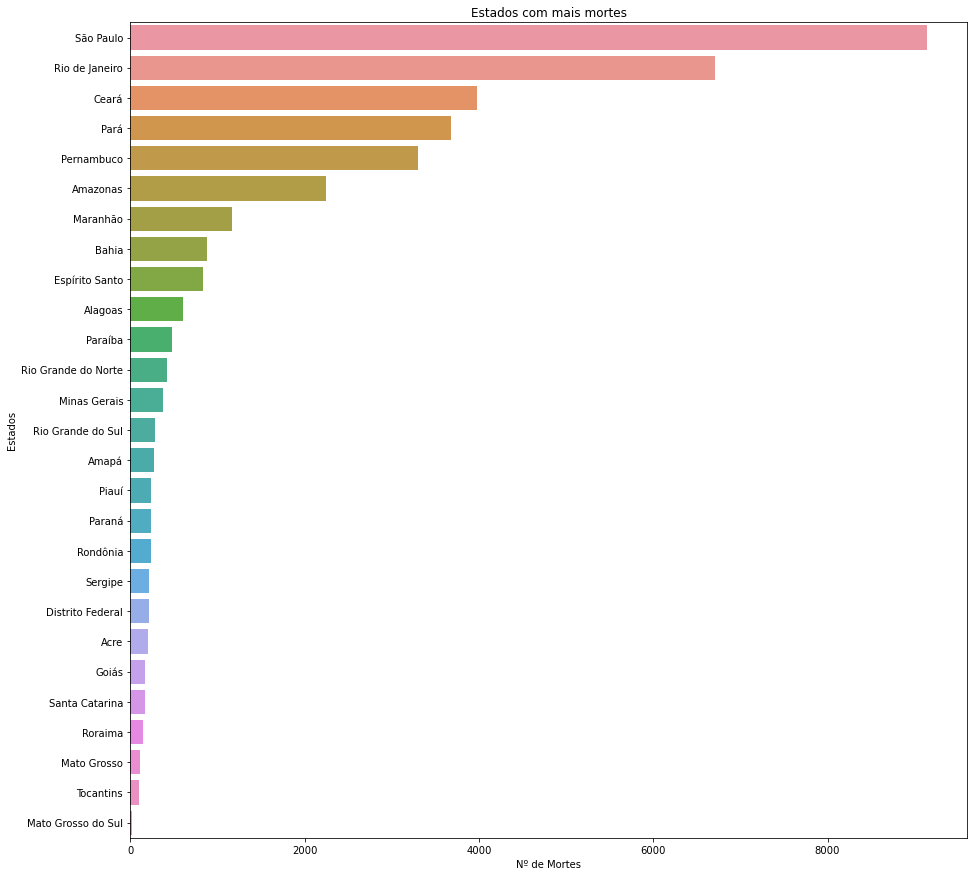

In [11]:
plt.figure(figsize=(15,15))
plt.title('Estados com mais mortes')
sns.barplot(y=casos_estados['state'],x=casos_estados['deaths'])
plt.ylabel('Estados')
plt.xlabel('Nº de Mortes')

In [12]:
# Função para fazer o label na coluna
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = int(rect.get_height())
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2.5, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

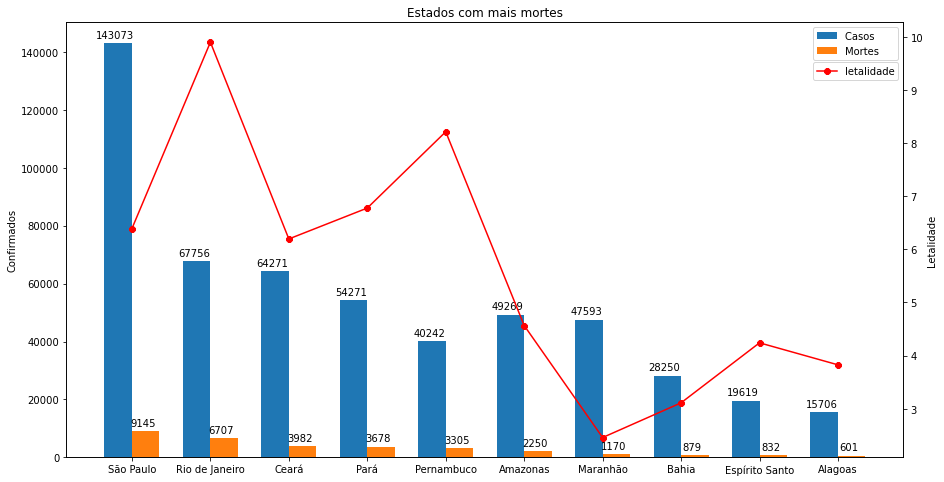

In [13]:
labels = casos_estados10['state']
casos=casos_estados10['cases']
mortes=casos_estados10['deaths']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, casos, width, label='Casos')
rects2 = ax.bar(x + width/2, mortes, width, label='Mortes')

ax.set_ylabel('Confirmados')
ax.set_title('Estados com mais mortes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(['Casos    ', 'Mortes     '])

ax1 = ax.twinx()
ax1.plot('state','letalidade',data=casos_estados10,marker='8', color='red')
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.92))
ax1.set_ylabel('Letalidade')

autolabel(rects1)
autolabel(rects2)

* Estados com mais mortes se encontram nas regiões Sudeste e Nordeste
* Rio de Janeiro possui a maior taxa de letalidade entre os estados
* Rio de Janeiro possui aproximadamente 50% a menos dos casos de São Paulo, porém 30% a menos de mortes, o que causa uma alta taxa de letalidade

Possíveis motivos da alta letalidade no Rio de Janeiro:
1.  Subnotificação
2.  Falta de leitos de UTI 
3.  Precariedade do sistema médico


In [14]:
# Definição de variáveis, para facilitar criei uma variável para cada estado que utilizarei depois
SP = covid[covid['state']=='São Paulo']
RJ = covid[covid['state']=='Rio de Janeiro']
CE = covid[covid['state']=='Ceará']
PA = covid[covid['state']=='Pará']
MG = covid[covid['state']=='Minas Gerais']
PE = covid[covid['state']=='Pernambuco']
MS = covid[covid['state']=='Mato Grosso do Sul']
AM = covid[covid['state']=='Amazonas']

In [15]:
lista = [n for n in range(len((PA['state'])))]

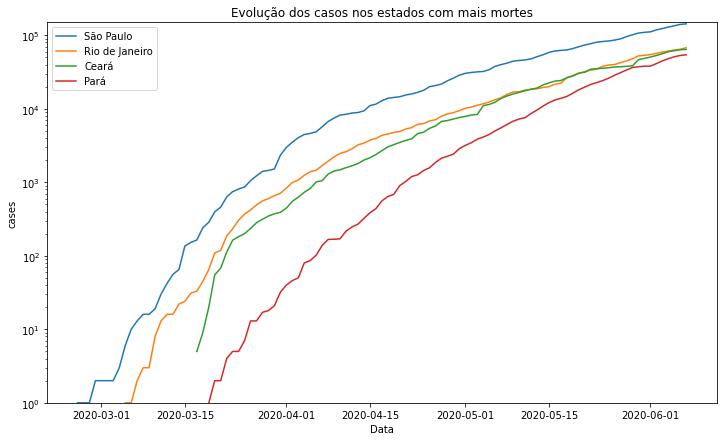

In [16]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title('Evolução dos casos nos estados com mais mortes')
sns.lineplot(x=SP['date'],y=SP['cases'],label='São Paulo')
sns.lineplot(x=RJ['date'],y=RJ['cases'], label='Rio de Janeiro')
sns.lineplot(x=CE['date'],y=CE['cases'], label='Ceará')
sns.lineplot(x=PA['date'],y=PA['cases'], label='Pará')
# sns.lineplot(x=lista,y=brasil['cases'][:len(lista)], label='Brasil')
plt.xlabel('Data')

ax.set_ylim(ymin=10**0)
ax.set_yscale('log')


Dos 4 estados com mais mortes, o que apresentou a primeira morte por último, foi o estado do Pará, de lá para cá, passaram-se 70 dias.

A próxima análise será feita dos primeiros 70 dias em cada um desses estados

As datas foram normalizadas a partir do dia 1º dia da 1ª morte de cada estado.

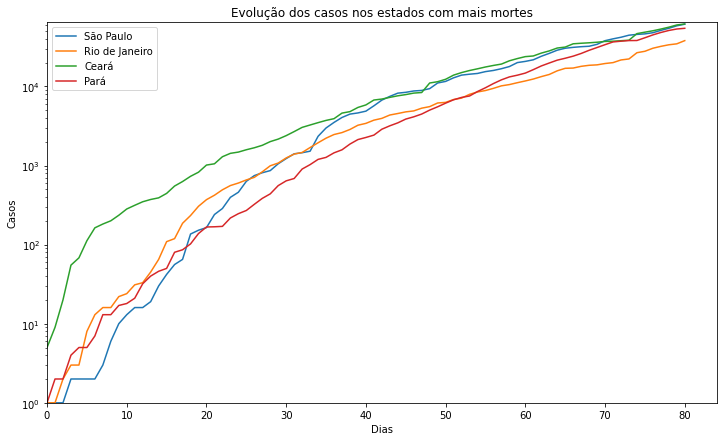

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title('Evolução dos casos nos estados com mais mortes')
sns.lineplot(x=lista,y=SP['cases'][:len(lista)],label='São Paulo')
sns.lineplot(x=lista,y=RJ['cases'][:len(lista)], label='Rio de Janeiro')
sns.lineplot(x=lista,y=CE['cases'][:len(lista)], label='Ceará')
sns.lineplot(x=lista,y=PA['cases'][:len(lista)], label='Pará')
# sns.lineplot(x=lista,y=brasil['cases'][:len(lista)], label='Brasil')

plt.xlabel('Dias')
plt.ylabel('Casos')
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=10**0)
ax.set_yscale('log')


Text(0.5, 0, 'Data')

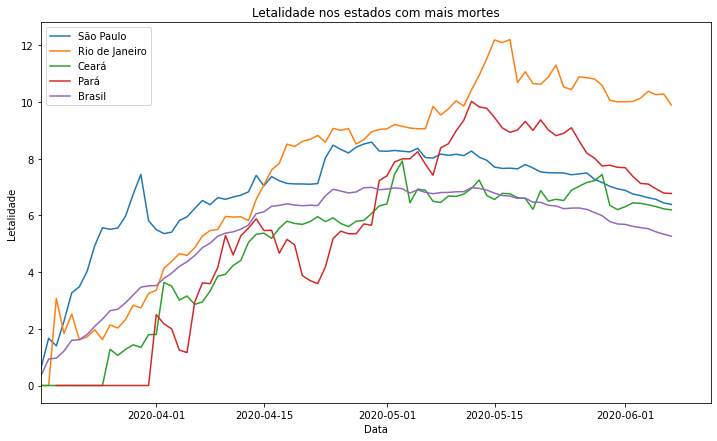

In [18]:
fig,ax = plt.subplots(figsize=(12,7))
plt.title('Letalidade nos estados com mais mortes')
sns.lineplot(x=SP['date'],y=SP['letalidade'],label='São Paulo')
sns.lineplot(x=RJ['date'],y=RJ['letalidade'],label='Rio de Janeiro')
sns.lineplot(x=CE['date'],y=CE['letalidade'],label='Ceará')
sns.lineplot(x=PA['date'],y=PA['letalidade'],label='Pará')
sns.lineplot(x=brasil['date'], y=brasil['letalidade'], label='Brasil')
# sns.lineplot(x=brasil['date'],y=brasil['letalidade'], label='Brasil')
ax.set_xlim(xmin=brasil[brasil['deaths']==1]['date'])
ax.set_ylabel('Letalidade')
ax.set_xlabel('Data')

Todos os 4 estados apresentam uma taxa de letalidade maior do que a média do Brasil

No gráfico abaixo será analisado morte por milhão de habitantes.

São Paulo apesar de ter grande número de mortes, apresenta dentre os 4 estados, a menor taxa de morte por milhão.

A partir do gráfico abaixo, podemos ver que a curva de São Paulo é menos acentuada do que os outros 3 estados.

Podemos ver também possivelmente o 'achatamento' da curva no gráfico de letalidade

Possivelmente pela quarentena ter sido implementada logo no início da pandemia.


(array([737501.]), 737588.1)

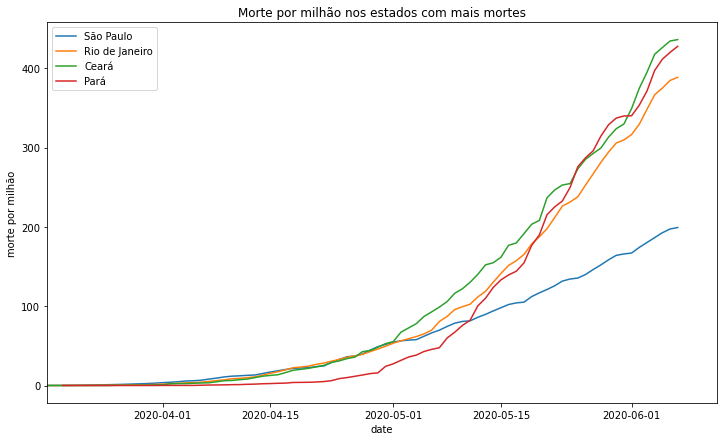

In [19]:
fig,ax = plt.subplots(figsize=(12,7))
plt.title('Morte por milhão nos estados com mais mortes')
sns.lineplot(x=SP['date'],y=SP['morte por milhão'],label='São Paulo')
sns.lineplot(x=RJ['date'],y=RJ['morte por milhão'],label='Rio de Janeiro')
sns.lineplot(x=CE['date'],y=CE['morte por milhão'],label='Ceará')
sns.lineplot(x=PA['date'],y=PA['morte por milhão'],label='Pará')

ax.set_xlim(xmin=brasil[brasil['deaths']==1]['date'])

In [20]:
# quais estados tem maior taxa de morte por milhão?
full_data = casos_estados.sort_values(by='morte por milhão',ascending = False)
full_data[:10]

,date,region,state,cases,deaths,Populacao,PIB,PIB per Capita,morte por milhão,letalidade
1359,2020-06-07,Norte,Amazonas,49269,2250,4144597,93204000,22936.28,542.875459,4.566766
1526,2020-06-07,Nordeste,Ceará,64271,3982,9132078,147890000,16394.99,436.045334,6.195640
1769,2020-06-07,Norte,Pará,54271,3678,8602865,155195000,18549.33,427.531991,6.777100
197,2020-06-07,Sudeste,Rio de Janeiro,67756,6707,17264943,671362000,40155.76,388.475073,9.898754
840,2020-06-07,Nordeste,Pernambuco,40242,3305,9557071,181551000,19164.52,345.817249,8.212812
2090,2020-06-07,Norte,Amapá,13045,272,845731,15480000,19405.11,321.615265,2.085090
1688,2020-06-07,Norte,Acre,7983,207,881935,14271000,17201.95,234.711175,2.593010
2327,2020-06-07,Norte,Roraima,5529,142,605761,12103000,23158.06,234.415883,2.568276
385,2020-06-07,Sudeste,Espírito Santo,19619,832,4018650,113352000,28222.56,207.034701,4.240787
102,2020-06-07,Sudeste,São Paulo,143073,9145,45919049,2119854000,47008.77,199.154821,6.391842


Quando analisamos a partir de morte por milhão de habitantes, São Paulo já não se apresenta entre os 5 primeiros e a concentração fica maior entre o Norte e Nordeste

Seria interessante então compararmos os 5 primeiros estados por morte por milhão de habitantes

Com o gráfico abaixo podemos verificar a diferença entre os estados de São Paulo e o Amazonas, por exemplo.

(array([737501.]), 737588.1)

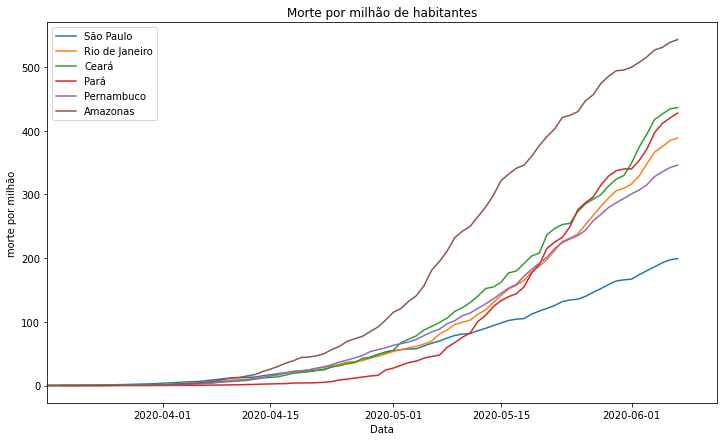

In [21]:
fig,ax = plt.subplots(figsize=(12,7))
plt.title('Morte por milhão de habitantes')
sns.lineplot(x=SP['date'],y=SP['morte por milhão'],label='São Paulo')
sns.lineplot(x=RJ['date'],y=RJ['morte por milhão'],label='Rio de Janeiro')
sns.lineplot(x=CE['date'],y=CE['morte por milhão'],label='Ceará')
sns.lineplot(x=PA['date'],y=PA['morte por milhão'],label='Pará')
sns.lineplot(x=PE['date'],y=PE['morte por milhão'],label='Pernambuco')
sns.lineplot(x=AM['date'],y=AM['morte por milhão'],label='Amazonas')

ax.set_xlabel('Data')


ax.set_xlim(xmin=brasil[brasil['deaths']==1]['date'])

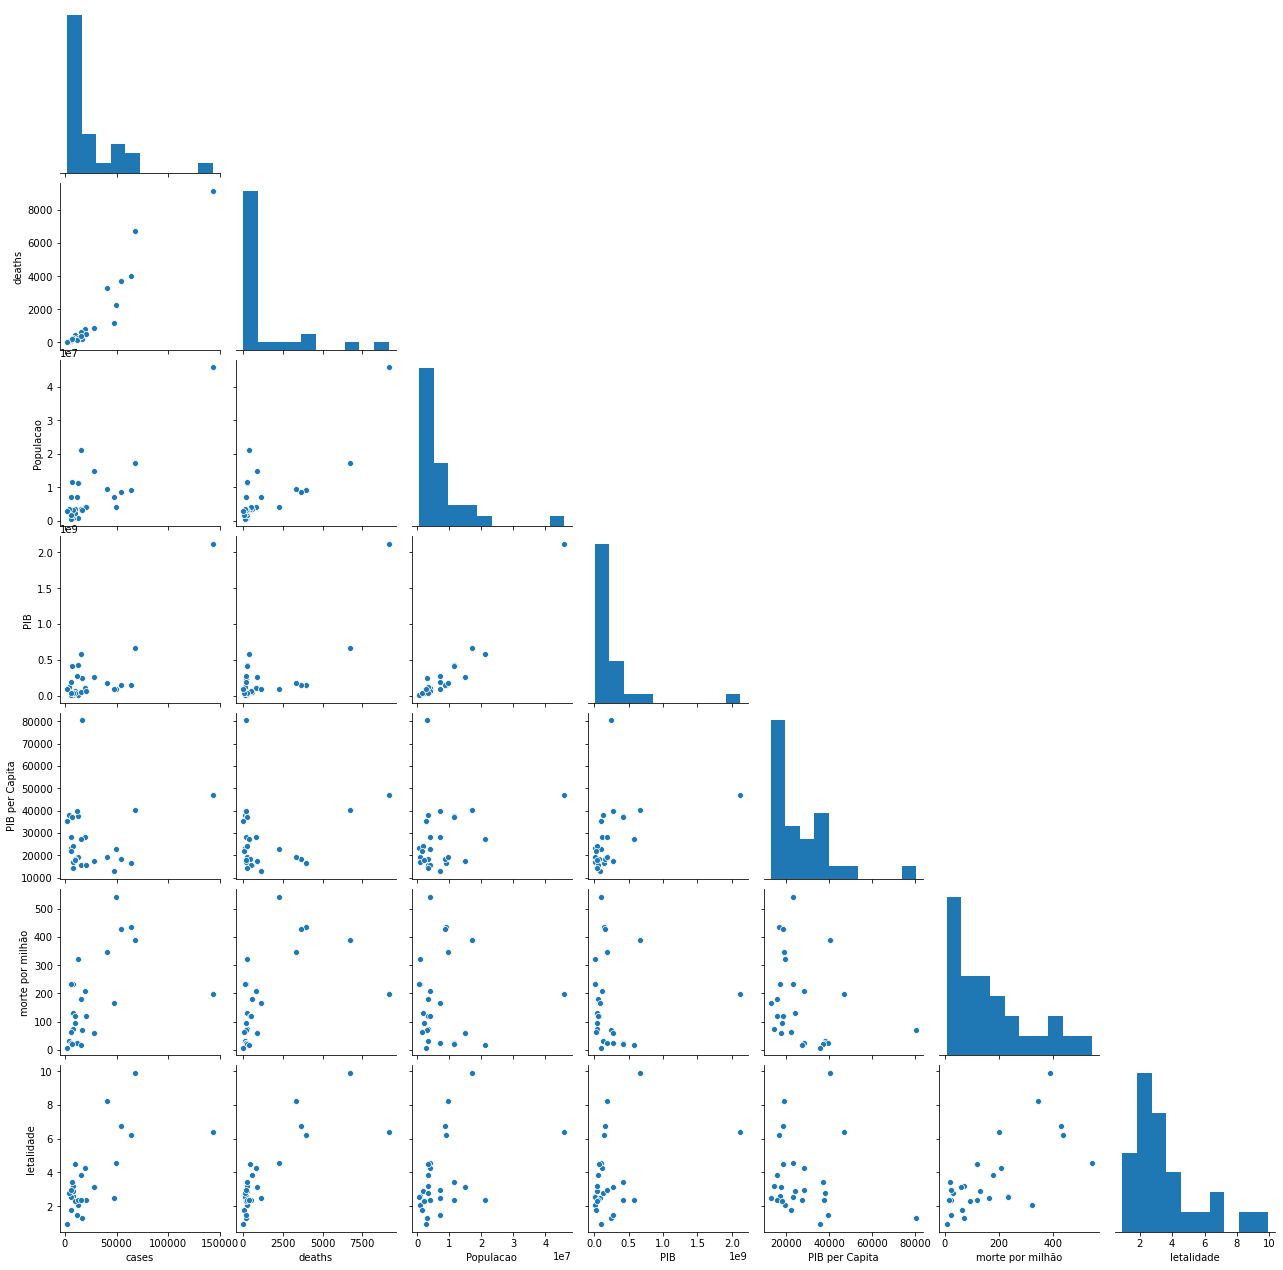

In [22]:
sns.pairplot(full_data, corner=True)

Com os dois gráficos de correlação podemos verificar a correlação entre as variáveis

Por exemplo, podemos verificar relação forte entre:
* nº de casos e mortes
* população e pib

Interessante que apesar da correlação baixa, existe uma correlação negativa entre:

* PIB per capita e morte por milhão (quanto maior o PIB per capita, menor a morte por milhão)
* PIB per capita e letalidade (quanto maior o PIB per capita, menor a letalidade)

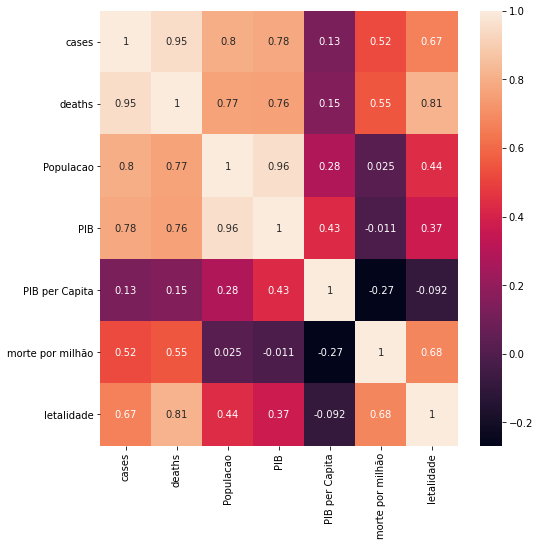

In [23]:
correlation = full_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True)


In [24]:
correlation['PIB per Capita'].sort_values(ascending=False)

PIB per Capita      1.000000
PIB                 0.430501
Populacao           0.280270
deaths              0.152126
cases               0.126720
letalidade         -0.092274
morte por milhão   -0.267500
Name: PIB per Capita, dtype: float64

In [25]:
# tratamento de dados
brasilgpd = gpd.read_file("../input/majson/data/Brasil.json")
brasilgpd.rename(columns={'ESTADO':'state'}, inplace=True)
brasil_total = pd.merge(brasilgpd,full_data,how='inner',on='state')
brasil_total.drop('date', axis=1, inplace=True)

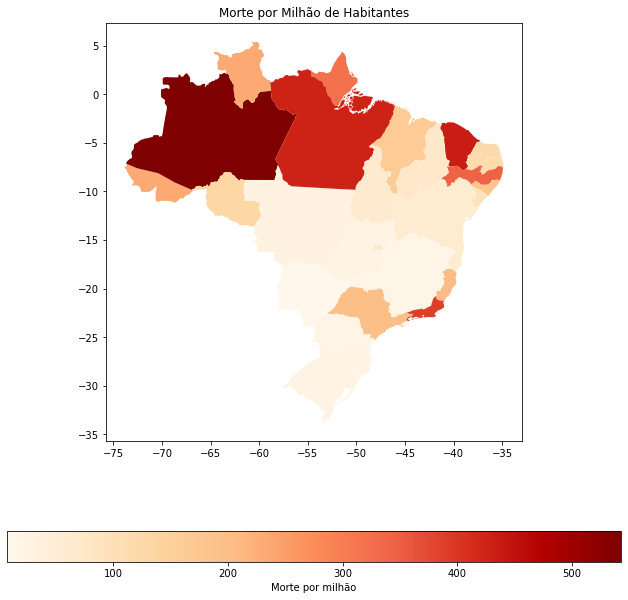

In [26]:
fig , ax = plt.subplots(figsize=(11,11))
plt.title('Morte por Milhão de Habitantes')
brasil_total.plot(column = 'morte por milhão',ax = ax, legend=True,
             legend_kwds={'label':'Morte por milhão', 'orientation':'horizontal'},
             cmap='OrRd')


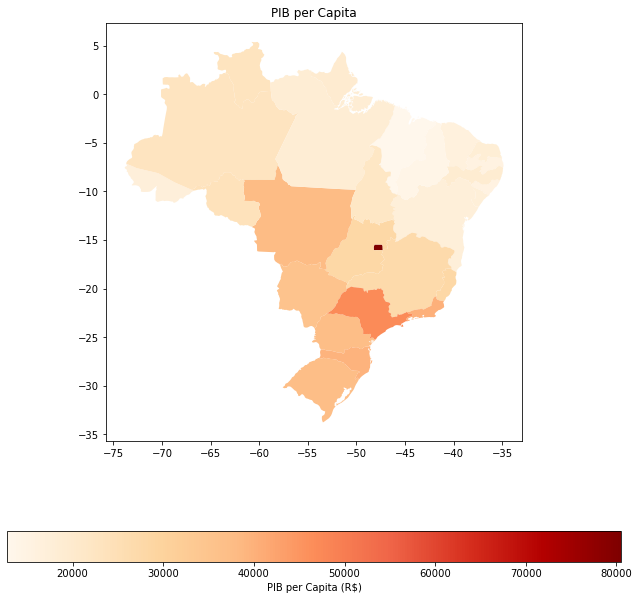

In [27]:
fig , ax = plt.subplots(figsize=(11,11))
plt.title('PIB per Capita')
brasil_total.plot(column = 'PIB per Capita',ax = ax, legend=True,
             legend_kwds={'label':'PIB per Capita (R$)', 'orientation':'horizontal'},
             cmap='OrRd', )
ax.set_xticklabels= ({'teste'})


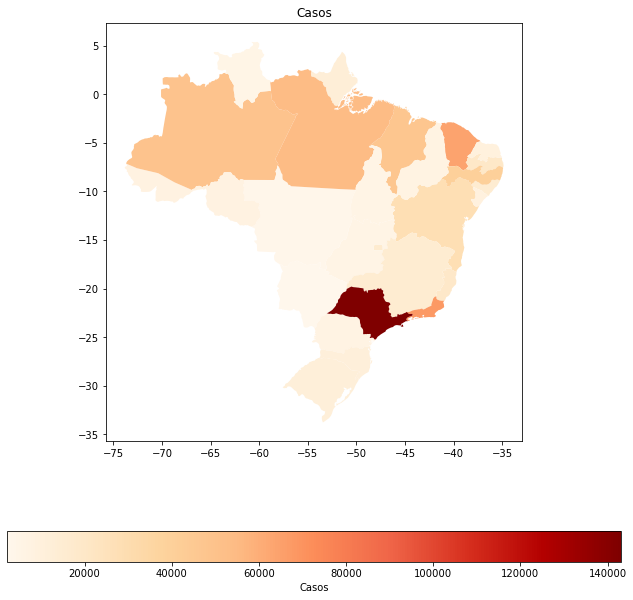

In [28]:
fig , ax = plt.subplots(figsize=(11,11))
plt.title('Casos')
brasil_total.plot(column = 'cases',ax = ax, legend=True,
             legend_kwds={'label':'Casos', 'orientation':'horizontal'},
             cmap='OrRd', )


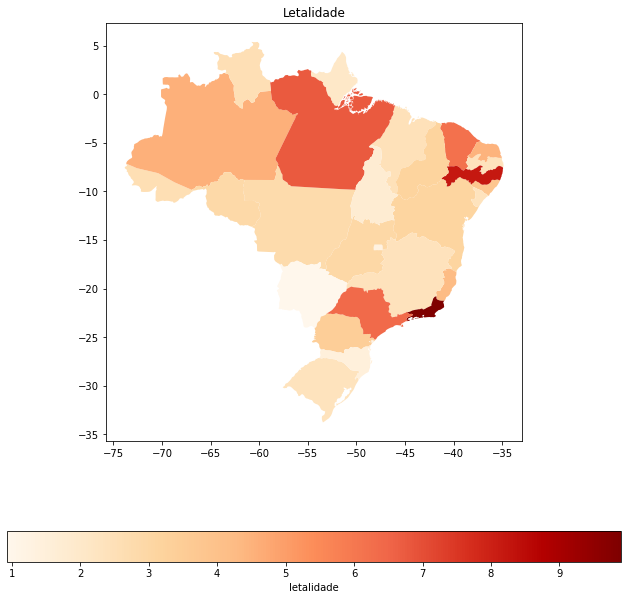

In [29]:
fig , ax = plt.subplots(figsize=(11,11))
plt.title('Letalidade')
brasil_total.plot(column = 'letalidade',ax = ax, legend=True,
             legend_kwds={'label':'letalidade', 'orientation':'horizontal'},
             cmap='OrRd', )


Ao analisarmos os gráficos mapas de morte por milhão e PIB per capita podemos verificar uma 'divisão' do País, estados com menor PIB per capita são os estados com maiores taxas de morte por milhão

In [30]:

# tratamento de dados, início sobre as cidades
cities = pd.read_csv("../input/corona-virus-brazil/brazil_covid19_cities.csv")
population_cities = pd.read_csv("../input/corona-virus-brazil/brazil_population_2019.csv",error_bad_lines=False)

cities['date'] = pd.to_datetime(cities['date'])
cities['date'] = cities['date'].dt.date
population_cities.rename(columns={'city':'name'}, inplace=True)
population_cities.drop('state', axis=1, inplace=True)
cities.rename(columns={'code':'city_code'}, inplace=True)
cities.drop('name', axis=1, inplace=True)

b'Skipping line 1282: expected 8 fields, saw 9\nSkipping line 1283: expected 8 fields, saw 9\nSkipping line 1293: expected 8 fields, saw 9\nSkipping line 1294: expected 8 fields, saw 9\nSkipping line 1300: expected 8 fields, saw 9\nSkipping line 1308: expected 8 fields, saw 9\nSkipping line 1309: expected 8 fields, saw 9\nSkipping line 1314: expected 8 fields, saw 9\nSkipping line 1319: expected 8 fields, saw 9\nSkipping line 1320: expected 8 fields, saw 9\nSkipping line 1321: expected 8 fields, saw 9\nSkipping line 1323: expected 8 fields, saw 9\n'


In [31]:
cities = pd.merge(cities,population_cities, how='inner', on='city_code')
cities.set_index('city_code',inplace=True)
cities['Morte 100 mil'] = (cities['deaths']) / (cities['population']) * 100000
cities['letalidade'] = (cities['deaths']) / (cities['cases']) * 100

In [32]:
city = cities[cities['date']==max(cities['date'])]
city = city[city['state']=='São Paulo']
city.drop(['state_code','region','state','date','health_region_code'], axis=1,inplace=True)

In [33]:
city_top_50 = city.sort_values(by='deaths', ascending=False)[:50]
city_top_50 = city_top_50.sort_values(by='Morte 100 mil', ascending=False)

Text(0.5, 0, 'Morte p/ 100 mil habitantes')

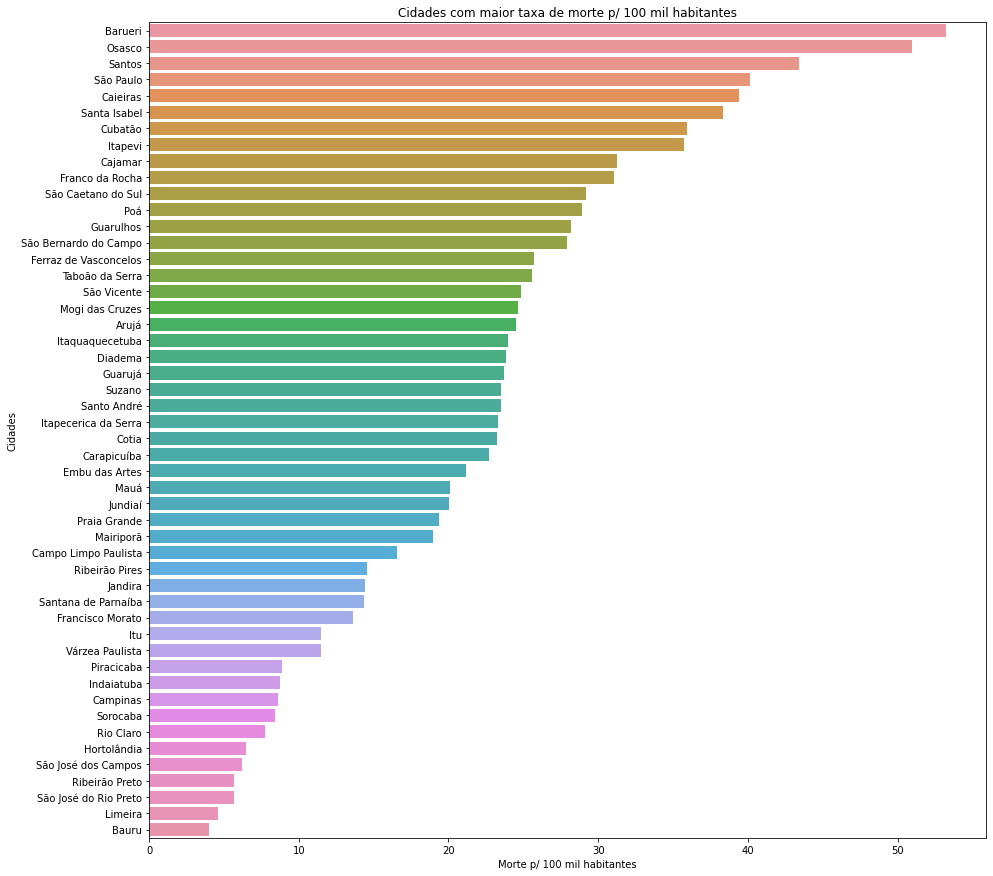

In [34]:
plt.figure(figsize=(15,15))
plt.title('Cidades com maior taxa de morte p/ 100 mil habitantes')
sns.barplot(x='Morte 100 mil',y='name',data=city_top_50)
plt.ylabel('Cidades')
plt.xlabel('Morte p/ 100 mil habitantes')

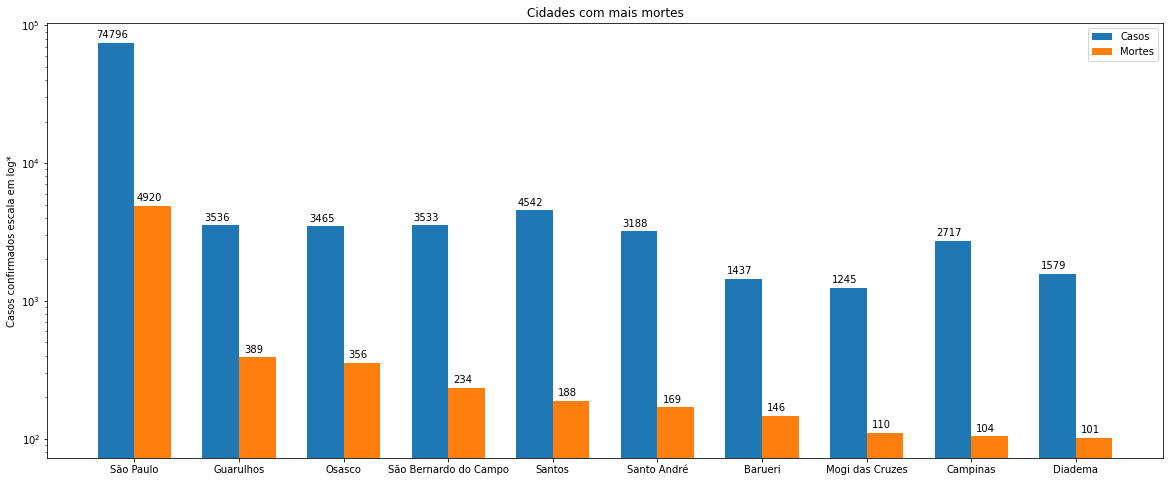

In [35]:
city10 = city.sort_values(by='deaths', ascending=False)[:10]
labels = city10['name']
casos=city10['cases']
mortes=city10['deaths']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(x - width/2, casos, width, label='Casos')
rects2 = ax.bar(x + width/2, mortes, width, label='Mortes')
ax.legend()
ax.set_ylabel('Casos confirmados escala em log*')
ax.set_title('Cidades com mais mortes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yscale('log')

autolabel(rects1)
autolabel(rects2)


**No gráfico abaixo a correlação entre população e número de casos das cidades**

0.9897795170707175


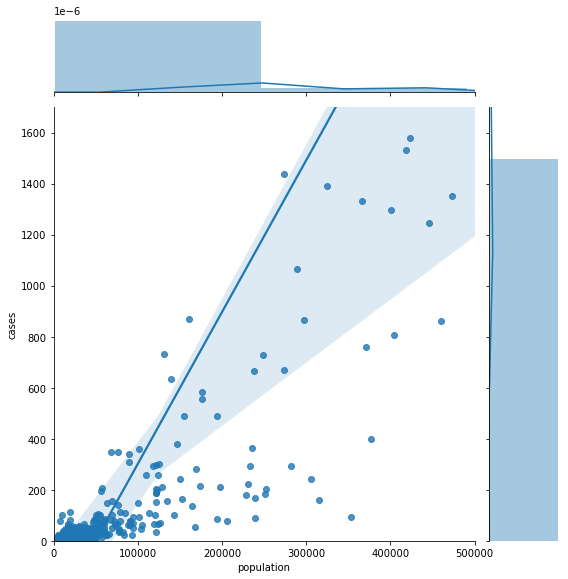

In [36]:
sns.jointplot(x='population',y='cases',data=city, kind='reg',dropna=True, xlim=(-0,500000), ylim=(-0,1700), height=8)
print(city['population'].corr(city['cases']))

In [39]:
# definição das variáveis , cidades da região
sp = cities[cities['state']=='São Paulo']
rio_claro = sp[sp['name']== 'Rio Claro']
piracicaba = sp[sp['name']== 'Piracicaba']
araras = sp[sp['name']== 'Araras']
limeira = sp[sp['name']=='Limeira']

leme = sp[sp['name']=='Leme']
sao_carlos = sp[sp['name'] == 'São Carlos']
araraquara = sp[sp['name']== 'Araraquara']

dstartcases = datetime.datetime(2020, 3, 28)
dstartdeaths = datetime.datetime(2020, 4,7)

Text(0.5, 0, 'Data')

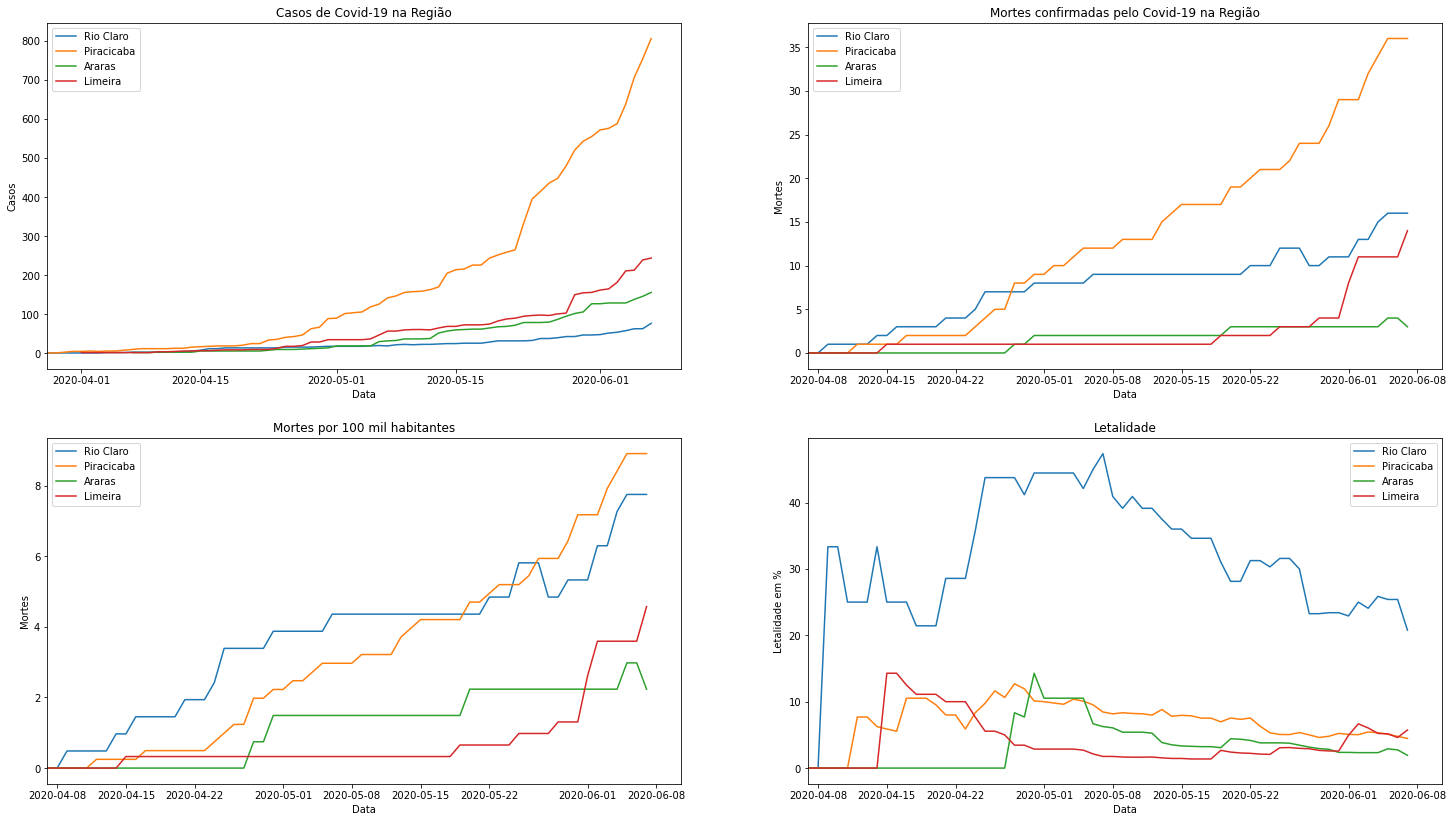

In [38]:
fig, ax = plt.subplots(2,2,figsize=(25,14))

ax[0,0].set_title('Casos de Covid-19 na Região')
ax[0,0] = sns.lineplot(x='date', y='cases', data=rio_claro,label='Rio Claro', ax=ax[0,0])
ax[0,0] = sns.lineplot(x='date', y='cases', data=piracicaba, label='Piracicaba', ax=ax[0,0])
ax[0,0] = sns.lineplot(x='date', y='cases', data=araras, label='Araras', ax=ax[0,0])
ax[0,0] = sns.lineplot(x='date', y='cases', data=limeira, label='Limeira', ax=ax[0,0])
ax[0,0].set_xlim(xmin=dstartcases)
ax[0,0].set_ylabel('Casos')
ax[0,0].set_xlabel('Data')
# plt.ylabel('Casos Confirmados')

ax[0,1].set_title('Mortes confirmadas pelo Covid-19 na Região')
ax[0,1] = sns.lineplot(x='date', y='deaths', data=rio_claro,label='Rio Claro', ax=ax[0,1])
ax[0,1] = sns.lineplot(x='date', y='deaths', data=piracicaba, label='Piracicaba', ax=ax[0,1])
ax[0,1] = sns.lineplot(x='date', y='deaths', data=araras, label='Araras',ax=ax[0,1])
ax[0,1] = sns.lineplot(x='date', y='deaths', data=limeira, label='Limeira',ax=ax[0,1])
ax[0,1].set_xlim(xmin=dstartdeaths)
ax[0,1].set_ylabel('Mortes')
ax[0,1].set_xlabel('Data')


ax[1,0].set_title('Mortes por 100 mil habitantes')
ax[1,0] = sns.lineplot(x='date', y='Morte 100 mil', data=rio_claro,label='Rio Claro', ax=ax[1,0])
ax[1,0] = sns.lineplot(x='date', y='Morte 100 mil', data=piracicaba, label='Piracicaba', ax=ax[1,0])
ax[1,0] = sns.lineplot(x='date', y='Morte 100 mil', data=araras, label='Araras',ax=ax[1,0])
ax[1,0] = sns.lineplot(x='date', y='Morte 100 mil', data=limeira, label='Limeira',ax=ax[1,0])
ax[1,0].set_xlim(xmin=dstartdeaths)
ax[1,0].set_ylabel('Mortes')
ax[1,0].set_xlabel('Data')

ax[1,1].set_title('Letalidade')
ax[1,1] = sns.lineplot(x='date', y='letalidade', data=rio_claro,label='Rio Claro', ax=ax[1,1])
ax[1,1] = sns.lineplot(x='date', y='letalidade', data=piracicaba, label='Piracicaba', ax=ax[1,1])
ax[1,1]= sns.lineplot(x='date', y='letalidade', data=araras, label='Araras',ax=ax[1,1])
ax[1,1] = sns.lineplot(x='date', y='letalidade', data=limeira, label='Limeira',ax=ax[1,1])
ax[1,1].set_xlim(xmin=dstartdeaths)
ax[1,1].set_ylabel('Letalidade em %')
ax[1,1].set_xlabel('Data')

Text(0.5, 0, 'Data')

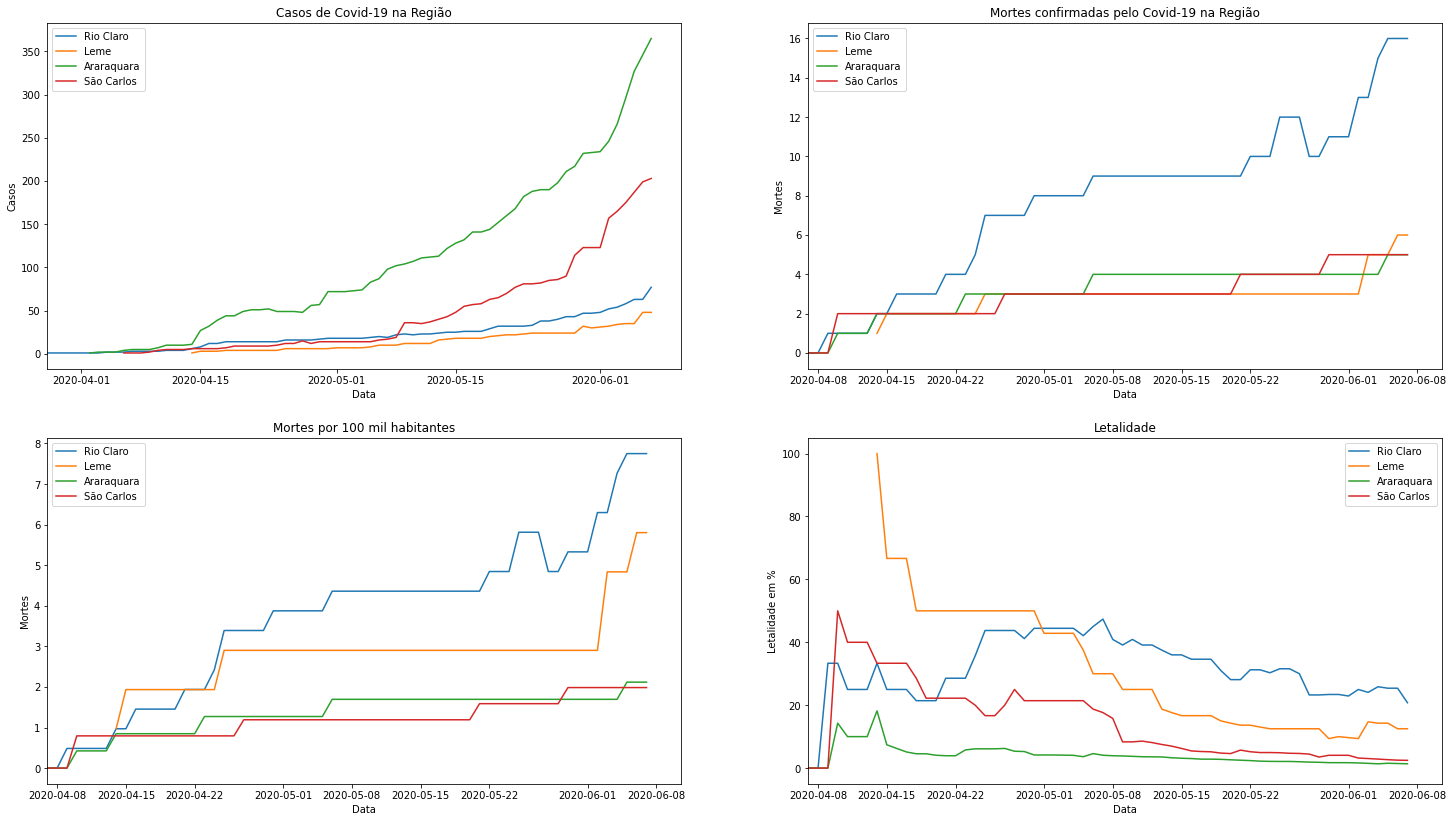

In [40]:
fig, ax = plt.subplots(2,2,figsize=(25,14))

ax[0,0].set_title('Casos de Covid-19 na Região')
ax[0,0] = sns.lineplot(x='date', y='cases', data=rio_claro,label='Rio Claro', ax=ax[0,0])
ax[0,0] = sns.lineplot(x='date', y='cases', data=leme, label='Leme', ax=ax[0,0])
ax[0,0] = sns.lineplot(x='date', y='cases', data=araraquara, label='Araraquara', ax=ax[0,0])
ax[0,0] = sns.lineplot(x='date', y='cases', data=sao_carlos, label='São Carlos', ax=ax[0,0])
ax[0,0].set_xlim(xmin=dstartcases)
ax[0,0].set_ylabel('Casos')
ax[0,0].set_xlabel('Data')
# plt.ylabel('Casos Confirmados')

ax[0,1].set_title('Mortes confirmadas pelo Covid-19 na Região')
ax[0,1] = sns.lineplot(x='date', y='deaths', data=rio_claro,label='Rio Claro', ax=ax[0,1])
ax[0,1] = sns.lineplot(x='date', y='deaths', data=leme, label='Leme', ax=ax[0,1])
ax[0,1] = sns.lineplot(x='date', y='deaths', data=araraquara, label='Araraquara',ax=ax[0,1])
ax[0,1] = sns.lineplot(x='date', y='deaths', data=sao_carlos, label='São Carlos',ax=ax[0,1])
ax[0,1].set_xlim(xmin=dstartdeaths)
ax[0,1].set_ylabel('Mortes')
ax[0,1].set_xlabel('Data')


ax[1,0].set_title('Mortes por 100 mil habitantes')
ax[1,0] = sns.lineplot(x='date', y='Morte 100 mil', data=rio_claro,label='Rio Claro', ax=ax[1,0])
ax[1,0] = sns.lineplot(x='date', y='Morte 100 mil', data=leme, label='Leme', ax=ax[1,0])
ax[1,0] = sns.lineplot(x='date', y='Morte 100 mil', data=araraquara, label='Araraquara',ax=ax[1,0])
ax[1,0] = sns.lineplot(x='date', y='Morte 100 mil', data=sao_carlos, label='São Carlos',ax=ax[1,0])
ax[1,0].set_xlim(xmin=dstartdeaths)
ax[1,0].set_ylabel('Mortes')
ax[1,0].set_xlabel('Data')

ax[1,1].set_title('Letalidade')
ax[1,1] = sns.lineplot(x='date', y='letalidade', data=rio_claro,label='Rio Claro', ax=ax[1,1])
ax[1,1] = sns.lineplot(x='date', y='letalidade', data=leme, label='Leme', ax=ax[1,1])
ax[1,1]= sns.lineplot(x='date', y='letalidade', data=araraquara, label='Araraquara',ax=ax[1,1])
ax[1,1] = sns.lineplot(x='date', y='letalidade', data=sao_carlos, label='São Carlos',ax=ax[1,1])
ax[1,1].set_xlim(xmin=dstartdeaths)
ax[1,1].set_ylabel('Letalidade em %')
ax[1,1].set_xlabel('Data')

Nos dados das cidades podemos verificar que:

1. Rio Claro apresenta muitos poucos casos, porém grandes quantidades de mortes em relação as outras cidades.
2. A taxa de mortalidade por 100 mil habitantes é alta, ficando juntamente com Piracicaba nas 50 cidades com alta taxa de mortalidade p/ 100 mil habitantes
3. A taxa de letalidade da cidade de Rio Claro apresenta uma tendência a queda, enquanto das outras estão se mantendo.
3. Estudos futuros poderão ser feitos para verificar a idade média entre a população das cidades. Esse pode ser um fator relevante para o número de óbitos.

Vale ressaltar que: Os dados de casos, são divergentes do que a secretaria da cidade de Rio Claro apresenta, podendo ser por atrasos ao enviar os dados as secretarias, ou então a divergência entre casos oficiais e de testes rápidos.


**Conclusão**

1. Os dados mostram que São Paulo apesar de ter o maior número de casos e mortes, não possui o maior taxa de mortalidade por 1 milhão de habitantes.
2. O PIB per capita tem uma baixa correlação negativa a letalidade e morte por milhão
3. Estados que apresentam um maior PIB per capita tendem a ter uma menor taxa de morte por milhão
4. A quarentena aplicada logo no início em São Paulo, mostra que surgiu efeitos positivos
5. Estados da região norte e nordeste estão entre os mais afetados pela pandemia